<a href="https://colab.research.google.com/github/Karthi-tecz/Ductile_jdbc/blob/main/Google%20Play%20Store%20Apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

try:
    df = pd.read_csv('googleplaystore.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'googleplaystore.csv' not found.")
except pd.errors.ParserError:
    print("Error: Unable to parse 'googleplaystore.csv'. Check file format.")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Investigate data types
print("\nData types of each column:\n", df.dtypes)

# Display the first few rows (already done in previous step, but repeating for clarity)
print("\nFirst few rows of the DataFrame:")
display(df.head())

# Identify missing values
print("\nNumber of missing values in each column:")
missing_values = df.isnull().sum()
display(missing_values)

Shape of the DataFrame: (10841, 13)

Data types of each column:
 App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

First few rows of the DataFrame:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up



Number of missing values in each column:


,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


**Reasoning**:
Fix the chained assignment warning and re-run the code.



In [26]:
# Fill missing 'Rating' values with the median
median_rating = df['Rating'].median()
df['Rating'] = df['Rating'].fillna(median_rating)

# Remove rows with missing values in other columns
df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace=True)

# Convert 'Reviews' to numeric
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Convert 'Size' to numeric, handling units
def convert_size(size_str):
    if isinstance(size_str, str):
        if 'k' in size_str:
            return float(size_str.replace('k', '')) / 1024
        elif 'M' in size_str:
            return float(size_str.replace('M', ''))
        elif size_str == 'Varies with device':
            return None
    return None

df['Size'] = df['Size'].apply(convert_size)

# Convert 'Installs' to numeric, removing '+' and ','
df['Installs'] = df['Installs'].astype(str).str.replace('+', '').str.replace(',', '').astype(float)

# Convert 'Price' to numeric, removing '$'
df['Price'] = df['Price'].astype(str).str.replace('$', '').astype(float)

# Remove duplicate rows
df.drop_duplicates(inplace=True, keep='first')

In [6]:
# Calculate descriptive statistics for numerical features
numerical_features = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
descriptive_stats = df[numerical_features].describe()
display(descriptive_stats)

# Analyze the distribution of categorical features
categorical_features = ['Category', 'Type', 'Content Rating', 'Genres']
for col in categorical_features:
    print(f"\nFrequency distribution for {col}:")
    frequency = df[col].value_counts()
    display(frequency)

# Top 10 categories and their app counts
top_10_categories = df['Category'].value_counts().head(10)
print("\nTop 10 Categories and their app counts:")
display(top_10_categories)

,Rating,Reviews,Installs,Price
count,10346.00000,1.034600e+04,1.034600e+04,10346.000000
mean,4.20377,4.063338e+05,1.417266e+07,1.031561
std,0.48573,2.698179e+06,8.028090e+07,16.287252
min,1.00000,0.000000e+00,0.000000e+00,0.000000
25%,4.10000,3.200000e+01,1.000000e+03,0.000000
50%,4.30000,1.688500e+03,1.000000e+05,0.000000
75%,4.50000,4.659825e+04,1.000000e+06,0.000000
max,5.00000,7.815831e+07,1.000000e+09,400.000000



Frequency distribution for Category:


,count
Category,
FAMILY,1939
GAME,1121
TOOLS,841
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,386
LIFESTYLE,373
COMMUNICATION,366



Frequency distribution for Type:


,count
Type,
Free,9584
Paid,762



Frequency distribution for Content Rating:


,count
Content Rating,
Everyone,8372
Teen,1146
Mature 17+,447
Everyone 10+,376
Adults only 18+,3
Unrated,2



Frequency distribution for Genres:


,count
Genres,
Tools,840
Entertainment,587
Education,526
Business,427
Medical,408
...,...
Role Playing;Brain Games,1
Strategy;Education,1
Racing;Pretend Play,1



Top 10 Categories and their app counts:


,count
Category,
FAMILY,1939
GAME,1121
TOOLS,841
BUSINESS,427
MEDICAL,408
PRODUCTIVITY,407
PERSONALIZATION,386
LIFESTYLE,373
COMMUNICATION,366


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.063472,NaN,0.044829,-0.019721
Reviews,0.063472,1.000000,NaN,0.634987,-0.009424
Size,NaN,NaN,NaN,NaN,NaN
Installs,0.044829,0.634987,NaN,1.000000,-0.011155
Price,-0.019721,-0.009424,NaN,-0.011155,1.000000


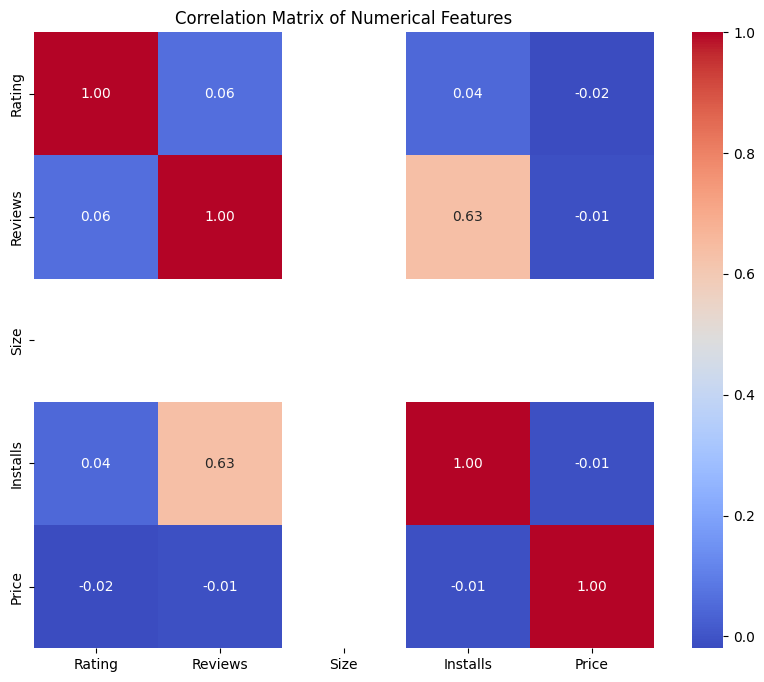

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr(method='pearson')
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [8]:
# Investigate top categories and popular apps
top_categories = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
print("Top 10 Categories by Total Installs:")
display(top_categories)


# Find the most popular apps based on installs
top_installed_apps = df.sort_values('Installs', ascending=False).head(10)
print("\nTop 10 Most Installed Apps:")
display(top_installed_apps[['App', 'Category', 'Installs']])


# Categories with highest average ratings
avg_ratings_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Categories by Average Rating:")
display(avg_ratings_by_category)

Top 10 Categories by Total Installs:


,Installs
Category,
GAME,3.154402e+10
COMMUNICATION,2.415228e+10
SOCIAL,1.251387e+10
PRODUCTIVITY,1.246309e+10
TOOLS,1.145227e+10
FAMILY,1.004163e+10
PHOTOGRAPHY,9.721248e+09
TRAVEL_AND_LOCAL,6.361887e+09
VIDEO_PLAYERS,6.222003e+09



Top 10 Most Installed Apps:


,App,Category,Installs
5395,Google Photos,PHOTOGRAPHY,1.000000e+09
4170,Google Drive,PRODUCTIVITY,1.000000e+09
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,1.000000e+09
4153,Hangouts,COMMUNICATION,1.000000e+09
3234,Google,TOOLS,1.000000e+09
9844,Google News,NEWS_AND_MAGAZINES,1.000000e+09
3127,Google Street View,TRAVEL_AND_LOCAL,1.000000e+09
2884,Google Photos,PHOTOGRAPHY,1.000000e+09
3232,Google Street View,TRAVEL_AND_LOCAL,1.000000e+09
3223,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,1.000000e+09



Top 10 Categories by Average Rating:


,Rating
Category,
EVENTS,4.395313
EDUCATION,4.375385
ART_AND_DESIGN,4.373437
BOOKS_AND_REFERENCE,4.336681
PERSONALIZATION,4.326425
PARENTING,4.300000
BEAUTY,4.283019
GAME,4.282070
HEALTH_AND_FITNESS,4.266993


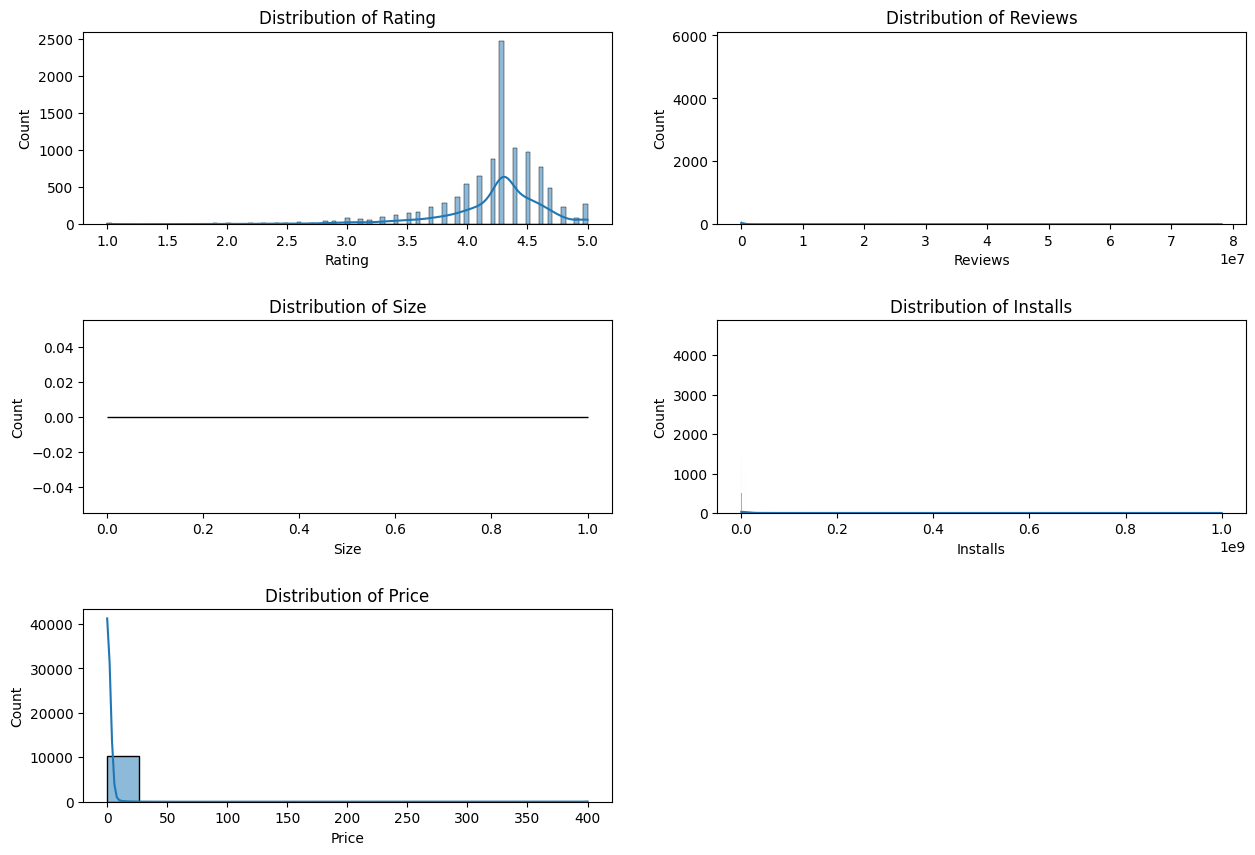

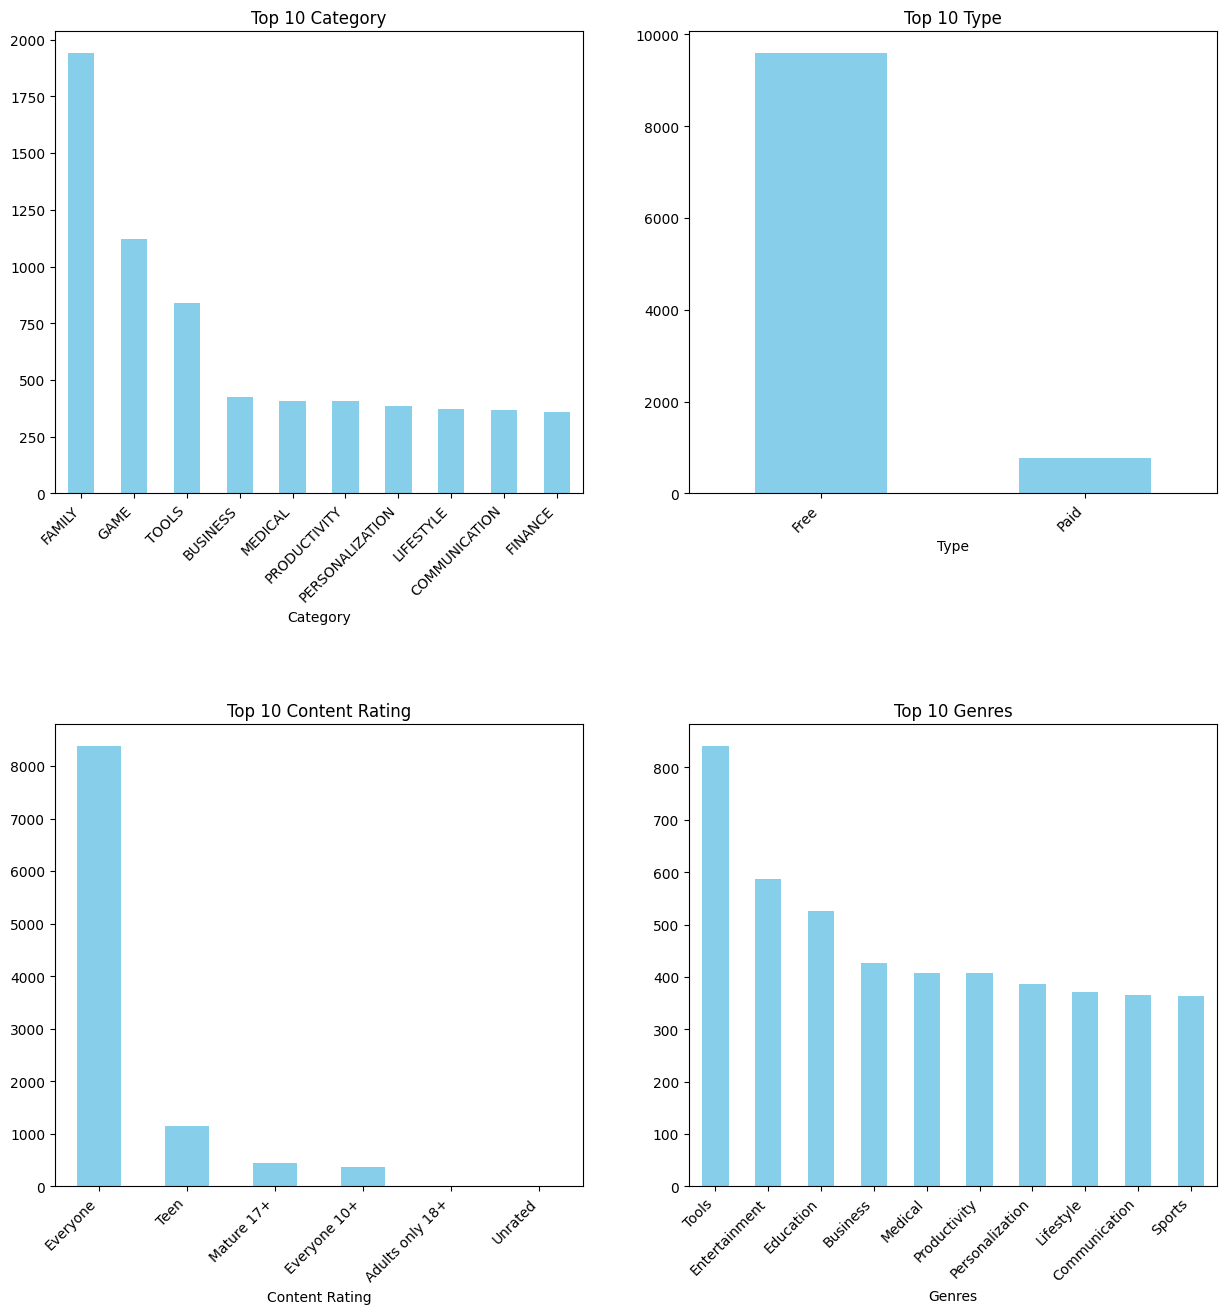

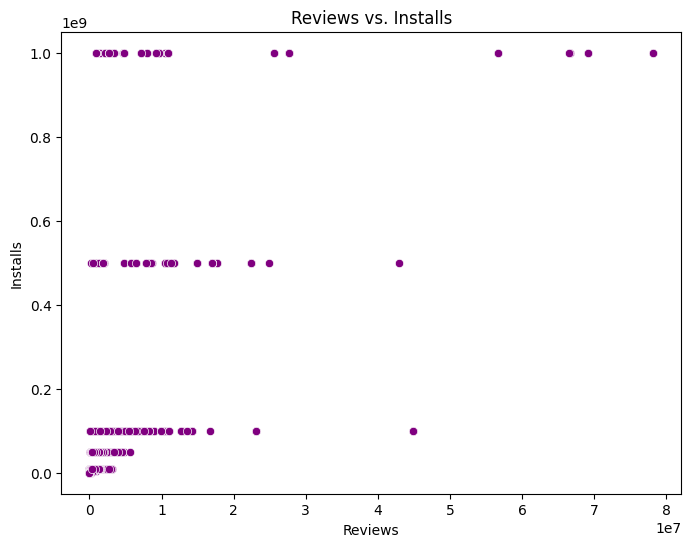

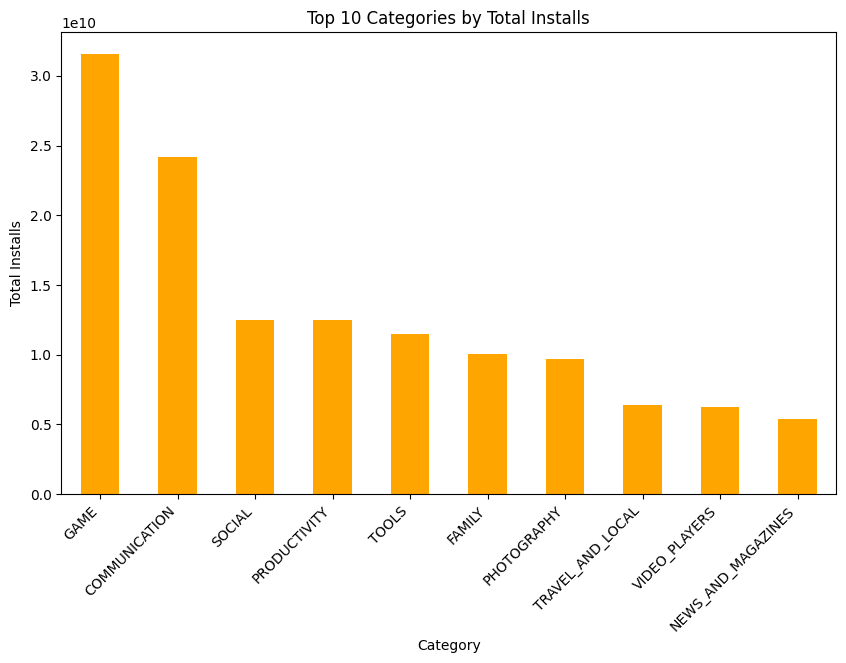

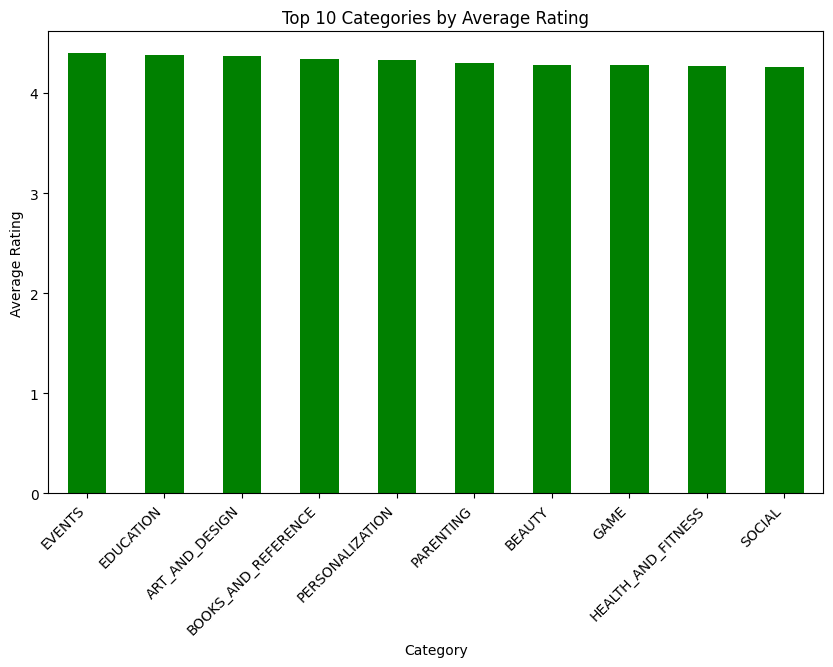

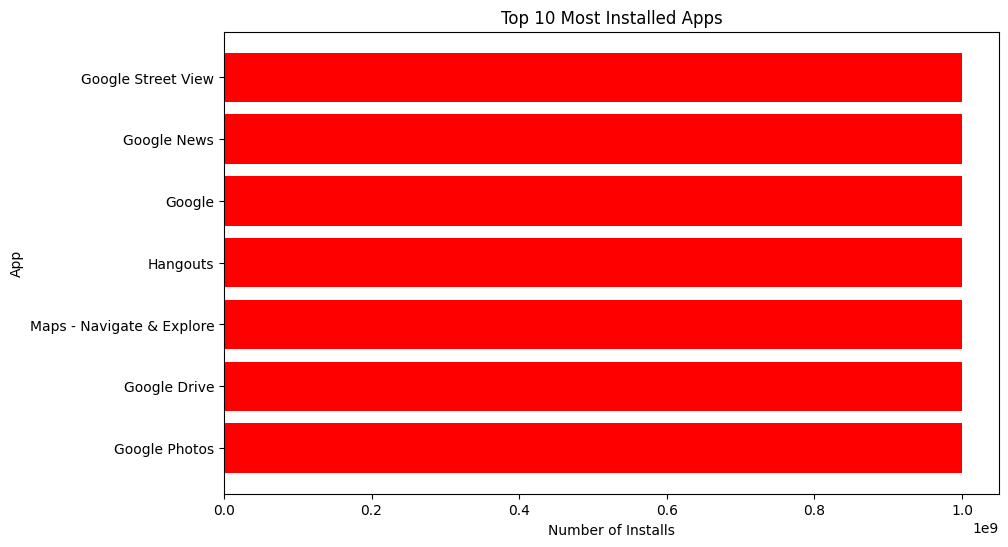

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
for i, col in enumerate(['Rating', 'Reviews', 'Size', 'Installs', 'Price']):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.show()

# Bar charts for categorical features (top 10)
plt.figure(figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
for i, col in enumerate(['Category', 'Type', 'Content Rating', 'Genres']):
    plt.subplot(2, 2, i + 1)
    df[col].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 {col}')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
plt.show()


# Scatter plot for Reviews vs. Installs
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Reviews', y='Installs', data=df, color='purple')
plt.title('Reviews vs. Installs')
plt.xlabel('Reviews')
plt.ylabel('Installs')
plt.show()

# Bar chart for top 10 categories by total installs
plt.figure(figsize=(10, 6))
top_categories_installs = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
top_categories_installs.plot(kind='bar', color='orange')
plt.title('Top 10 Categories by Total Installs')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar chart for top 10 categories by average rating
plt.figure(figsize=(10, 6))
top_categories_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
top_categories_rating.plot(kind='bar', color='green')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


# Horizontal bar chart for top 10 most installed apps
plt.figure(figsize=(10, 6))
top_10_apps = df.sort_values(by='Installs', ascending=False).head(10)
plt.barh(top_10_apps['App'], top_10_apps['Installs'], color='red')
plt.xlabel('Number of Installs')
plt.ylabel('App')
plt.title('Top 10 Most Installed Apps')
plt.show()

In [12]:
# prompt: model training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler # Import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # Import SimpleImputer
import numpy as np
import pandas as pd # Import pandas

# Select features (X) and target (y)
features = ['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres']
target = 'Rating'

# Drop rows where the target variable ('Rating') is missing
# This is the corrected part to avoid an empty DataFrame
df_model = df.dropna(subset=[target])

X = df_model[features]
y = df_model[target]

# Identify categorical and numerical features
categorical_features = ['Category', 'Type', 'Content Rating', 'Genres']
numerical_features = ['Reviews', 'Size', 'Installs', 'Price']

# Create a column transformer to apply preprocessing to different column types
# Add an imputer to handle missing numerical values
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')), # Impute missing numerical values with the median
            ('scaler', StandardScaler()) # Optional: Scale numerical features
        ]), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with the preprocessor and a Linear Regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Size']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Mean Squared Error (MSE): 0.23
Root Mean Squared Error (RMSE): 0.48
R-squared (R2): 0.02


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Size']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [14]:
# prompt: highest number of apps instep by step

# Identify the category with the highest number of apps
highest_app_category = df['Category'].value_counts().idxmax()
highest_app_count = df['Category'].value_counts().max()

print(f"The category with the highest number of apps is '{highest_app_category}' with {int(highest_app_count)} apps.")

The category with the highest number of apps is 'FAMILY' with 1939 apps.


In [15]:
# prompt: highest number of installation

# Identify the app with the highest number of installs
highest_installed_app = df.sort_values('Installs', ascending=False).iloc[0]
highest_installed_app_name = highest_installed_app['App']
highest_installed_app_installs = highest_installed_app['Installs']

print(f"The app with the highest number of installs is '{highest_installed_app_name}' with {int(highest_installed_app_installs)} installs.")

The app with the highest number of installs is 'Google Photos' with 1000000000 installs.


The category with the highest average rating is 'EVENTS' with an average rating of 4.40.


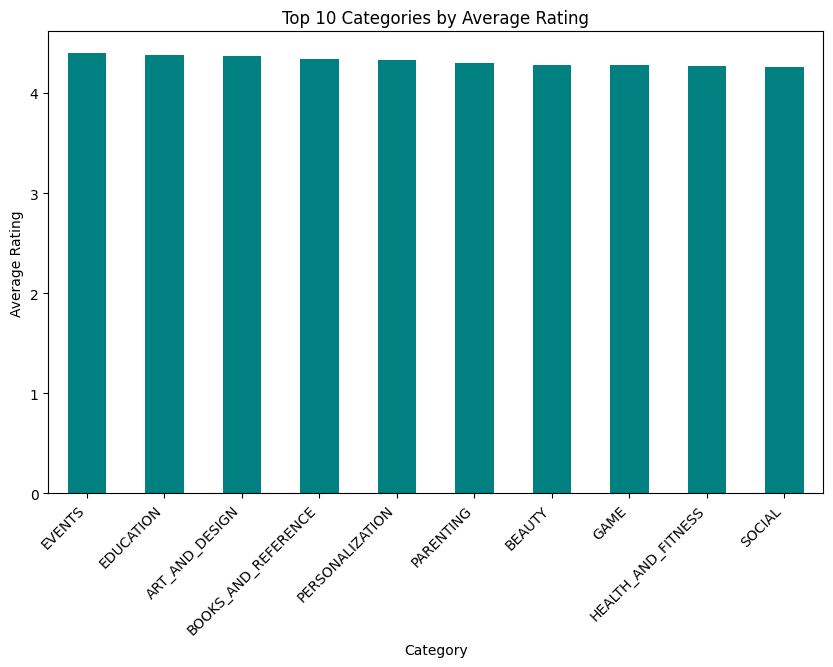

In [17]:
# prompt: which category of highest ratings and visualation

import matplotlib.pyplot as plt
# Identify the category with the highest average rating
highest_rating_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).index[0]
highest_average_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).iloc[0]

print(f"The category with the highest average rating is '{highest_rating_category}' with an average rating of {highest_average_rating:.2f}.")

# Visualize the top 10 categories by average rating
plt.figure(figsize=(10, 6))
top_10_avg_rating_categories = df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
top_10_avg_rating_categories.plot(kind='bar', color='teal')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

In [27]:
# A list of average ratings by app category.
average_ratings_by_category = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print("Average Ratings by App Category:")
display(average_ratings_by_category)

# A list of the top 10 most installed apps.
top_10_installed_apps = df.sort_values('Installs', ascending=False).head(10)
print("\nTop 10 Most Installed Apps:")
display(top_10_installed_apps[['App', 'Category', 'Installs']])

# The top 5 most common genres.
# Since the 'Genres' column can contain multiple genres separated by semicolons,
# we first need to split these strings and then count the individual genres.
genres_list = df['Genres'].str.split(';').explode()
top_5_genres = genres_list.value_counts().head(5)
print("\nTop 5 Most Common Genres:")
display(top_5_genres)


Average Ratings by App Category:


,Rating
Category,
EVENTS,4.395313
EDUCATION,4.375385
ART_AND_DESIGN,4.373437
BOOKS_AND_REFERENCE,4.336681
PERSONALIZATION,4.326425
PARENTING,4.300000
BEAUTY,4.283019
GAME,4.282070
HEALTH_AND_FITNESS,4.266993



Top 10 Most Installed Apps:


,App,Category,Installs
5395,Google Photos,PHOTOGRAPHY,1.000000e+09
4170,Google Drive,PRODUCTIVITY,1.000000e+09
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,1.000000e+09
4153,Hangouts,COMMUNICATION,1.000000e+09
3234,Google,TOOLS,1.000000e+09
9844,Google News,NEWS_AND_MAGAZINES,1.000000e+09
3127,Google Street View,TRAVEL_AND_LOCAL,1.000000e+09
2884,Google Photos,PHOTOGRAPHY,1.000000e+09
3232,Google Street View,TRAVEL_AND_LOCAL,1.000000e+09
3223,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,1.000000e+09



Top 5 Most Common Genres:


,count
Genres,
Tools,841
Education,716
Entertainment,627
Business,427
Medical,408


In [31]:
import nltk
import pandas as pd # Import pandas as it's used in the code

# Try downloading without a specific path first
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    # If LookupError occurs, it means the resource is not found, so download it
    print("Vader lexicon not found, attempting to download...")
    nltk.download('vader_lexicon')
except Exception as e:
    # Catch any other potential errors during download
    print(f"An error occurred during NLTK download: {e}")


from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Drop rows where 'Last Updated' could not be parsed
df.dropna(subset=['Last Updated'], inplace=True)
print("\nDistribution of App Last Updated Dates:")
# Plotting the distribution might require resampling if there are many unique dates
# For simplicity, let's show the earliest and latest update dates
print(f"Earliest Update Date: {df['Last Updated'].min()}")
print(f"Latest Update Date: {df['Last Updated'].max()}")



Distribution of App Last Updated Dates:
Earliest Update Date: 2010-05-21 00:00:00
Latest Update Date: 2018-08-08 00:00:00
